In [1]:
# 权重衰退
# 权重衰退是最广泛使用的正则化的技术之一

In [2]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

# 生成人工数据集：
![gs](./assets/gs.jpg)

In [4]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size, is_train=True)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

In [5]:
# 初始化模型参数

In [6]:
def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

In [7]:
# 定义 L_2 范数惩罚

In [8]:
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

In [9]:
# 本次的训练函数和之前训练函数的最大区别是：增加了输入参数lambd。
# 我们用超参数lambd来控制正则项的重要程度。当lambd等于0时，相当于没有正则化；当lambd趋近于无穷时，相当于权重趋近于0.

In [10]:
# 训练函数
def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            # with torch.enable_grad():
            l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    d2l.plt.show()
    print('w的L2范数是：', torch.norm(w).item())

In [11]:
# 忽视正则化直接进行训练

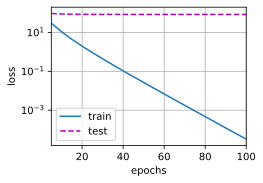

w的L2范数是： 13.691691398620605


In [12]:
train(lambd=0)

In [13]:
# 使用权重衰减后，解决了过拟合的问题

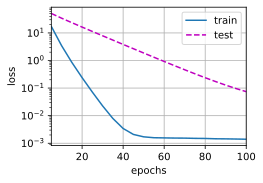

w的L2范数是： 0.37326160073280334


In [14]:
train(lambd=3)

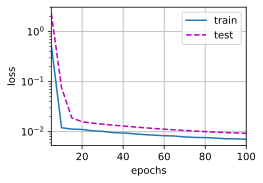

w的L2范数是： 0.013023575767874718


In [15]:
train(lambd=30)

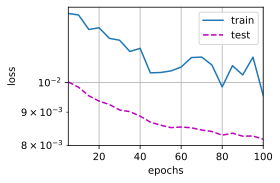

w的L2范数是： 0.004356773104518652


In [16]:
train(lambd=300)

In [17]:
# 简洁实现
# L_2 正则化可以写在目标函数中，也可以写在训练算法里面
# 在简洁实现中，我们将权重衰减写在训练算法中

In [18]:
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss(reduction='none')
    num_epochs, lr = 100, 0.003
    trainer = torch.optim.SGD([{
        "params": net[0].weight,
        "weight_decay": wd}, {
        "params": net[0].bias }], lr=lr)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            # with torch.enable_grad():
            trainer.zero_grad()
            l = loss(net(X), y)
            l.mean().backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1,
                         (d2l.evaluate_loss(net, train_iter, loss),
                          d2l.evaluate_loss(net, test_iter, loss)))
        print('w的L2范数：', net[0].weight.norm().item())
    d2l.plt.show()

w的L2范数： 13.751592636108398


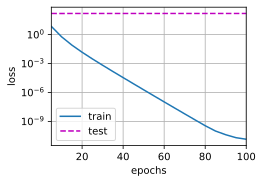

In [19]:
train_concise(0)

w的L2范数： 0.3920135200023651


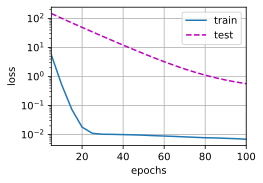

In [20]:
train_concise(3)

w的L2范数： 0.03674475476145744


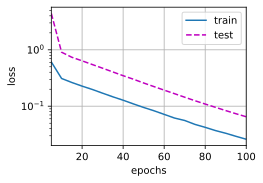

In [21]:
train_concise(30)

w的L2范数： 0.006009101867675781


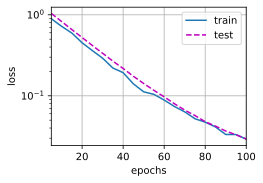

In [22]:
train_concise(300)